# Online Retail EDA and Clustring

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotly.offline import iplot

#wrodcloud
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

import warnings
warnings.simplefilter('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
path = "C:\\Users\\DELL\\FSDS\\Online_Retail.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0
TotalPrice,541909.0,17.987795,378.810824,-168469.60,3.40,9.75,17.40,168469.6


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
data.shape

(541909, 8)

- checking the missing values

In [52]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

- 25% of CustomerID is missing
- droping the NA values for accurate results

In [53]:
data = data.dropna().reset_index(drop=True)

In [58]:
data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
TotalPrice      4041
dtype: int64

In [42]:
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

- Create a feature for total purchase price and Convert InvoiceDate to datetime format

In [11]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


 - There are values that are in negative

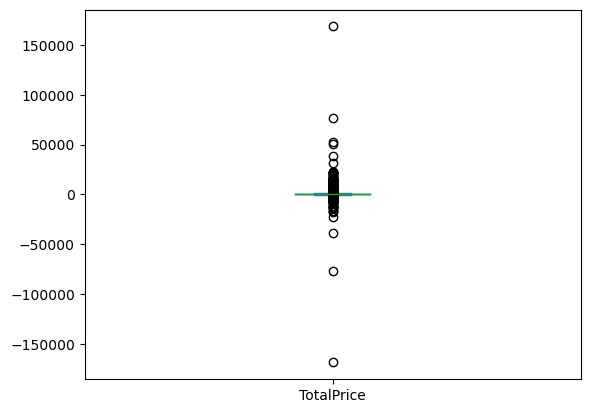

In [13]:
data.groupby('InvoiceNo')['TotalPrice'].sum().plot(kind = 'box');

In [15]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


- These could be wrong entries that can be removed from the dataset

- Creating Word Cloud

In [36]:
def plot_wordcloud(data, col, text = None):
    stop = stopwords.words('english')
    all_words = [word for each in data[col] for word in str(each).lower().split() if word not in stop]
    word_freq = Counter(all_words)

    wordcloud = WordCloud(width = 900,
                          height = 500,
                          max_words = 200,
                          max_font_size = 100,
                          relative_scaling = 0.5,
                          background_color = "rgba(255, 255, 255, 0)", 
                          mode = "RGBA",
                          normalize_plurals = True).generate_from_frequencies(word_freq)
    plt.figure(figsize = (16, 12))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(text, fontsize = 16)
    plt.axis("off")
    plt.show()

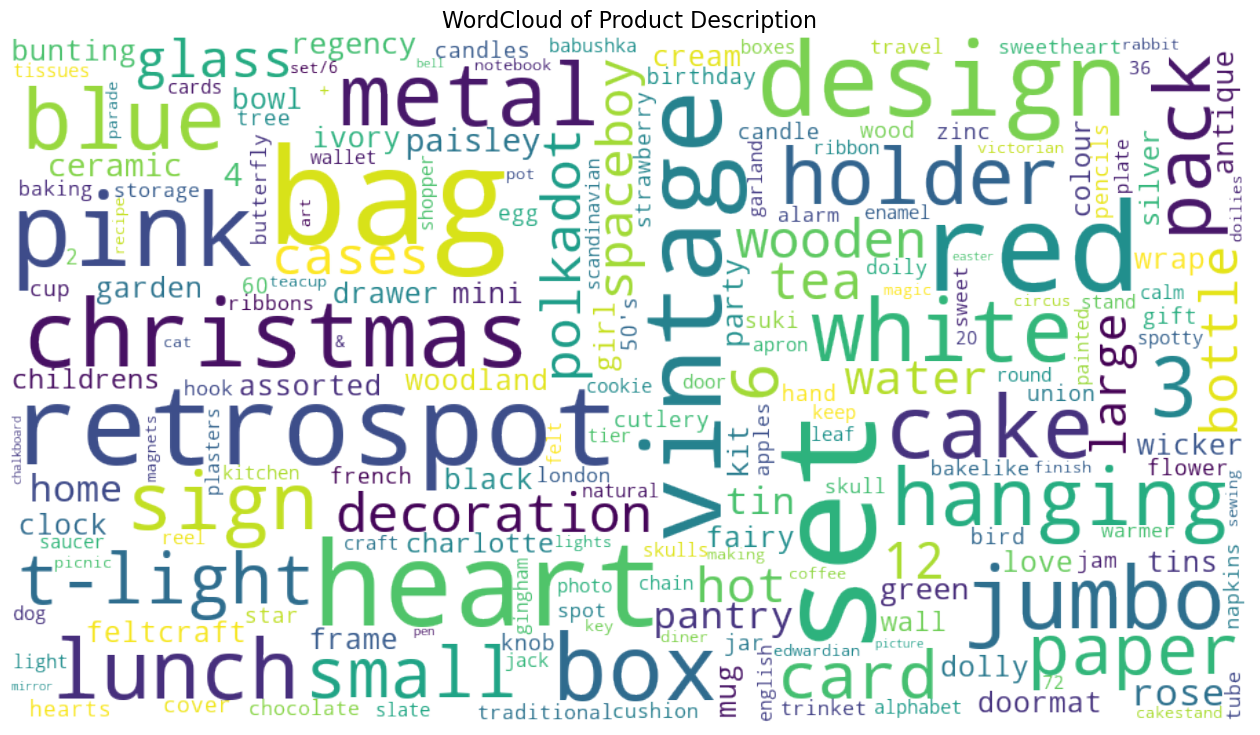

In [40]:
plot_wordcloud(data, 'Description', 'WordCloud of Product Description')

- Creating another dataset from Clustring

In [46]:
custumer_data = pd.DataFrame({'#invoce': data.groupby('CustomerID')['InvoiceNo'].nunique(),
                              'Country': data.groupby('CustomerID')['Country'].unique().str[0],
                              'Mean_purch': data.groupby('CustomerID')['TotalPrice'].mean(),
                              'Sum_purch': data.groupby('CustomerID')['TotalPrice'].sum(),
                              '#item': data.groupby('CustomerID')['StockCode'].nunique(),
                              '#quantity':data.groupby('CustomerID')['Quantity'].sum(),
                              'Mean_quant': data.groupby('CustomerID')['Quantity'].mean(),
                              'life_time': (data.groupby('CustomerID')['InvoiceDate'].max() - data.groupby('CustomerID')['InvoiceDate'].min()).dt.days})

In [47]:
custumer_data

,#invoce,Country,Mean_purch,Sum_purch,#item,#quantity,Mean_quant,life_time
CustomerID,,,,,,,,
12346.0,2,United Kingdom,0.000000,0.00,1,0,0.000000,0
12347.0,7,Iceland,23.681319,4310.00,103,2458,13.505495,365
12348.0,4,Finland,57.975484,1797.24,22,2341,75.516129,282
12349.0,1,Italy,24.076027,1757.55,73,631,8.643836,0
12350.0,1,Norway,19.670588,334.40,17,197,11.588235,0
...,...,...,...,...,...,...,...,...
18280.0,1,United Kingdom,18.060000,180.60,10,45,4.500000,0
18281.0,1,United Kingdom,11.545714,80.82,7,54,7.714286,0
18282.0,3,United Kingdom,13.584615,176.60,12,98,7.538462,118


# Applying K - Means 

In [88]:
custumer_data.head()

,#invoce,Country,Mean_purch,Sum_purch,#item,#quantity,Mean_quant,life_time
CustomerID,,,,,,,,
12346.0,2,United Kingdom,0.000000,0.00,1,0,0.000000,0
12347.0,7,Iceland,23.681319,4310.00,103,2458,13.505495,365
12348.0,4,Finland,57.975484,1797.24,22,2341,75.516129,282
12349.0,1,Italy,24.076027,1757.55,73,631,8.643836,0
12350.0,1,Norway,19.670588,334.40,17,197,11.588235,0


In [107]:
#Extracting the independent feature
X = custumer_data.iloc[:,[0,2,3,4,5,6,7]].values
#X = custumer_data.drop(columns=['Country'])

In [108]:
#using the elbow methods to find the optimal number of clusters
from sklearn.cluster import KMeans

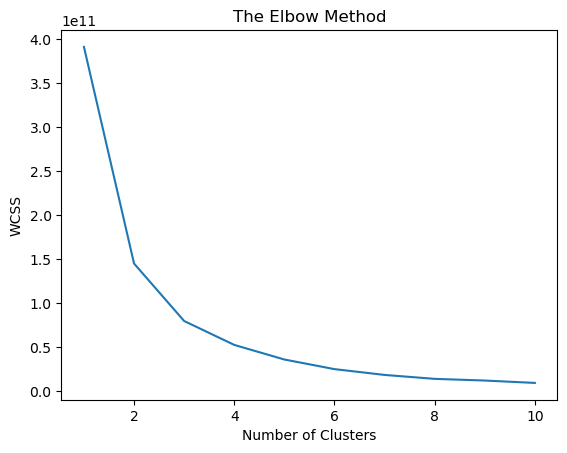

In [109]:
#wcss- within cluster sum of square

wcss = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i,init = 'k-means++')
    kmeans.fit(X) #Training the model
    wcss.append(kmeans.inertia_) #we will get the wcss from inertia_
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [110]:
kmeans = KMeans(n_clusters=4, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

In [120]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
kmeans.cluster_centers_

array([[4.60585793e+00, 2.76032324e+01, 1.37850682e+03, 5.86399908e+01,
        8.20252998e+02, 2.16320818e+01, 1.31624077e+02],
       [8.82000000e+01, 1.75474958e+02, 1.29057952e+05, 7.09600000e+02,
        6.86976000e+04, 8.15482182e+01, 3.55200000e+02],
       [5.65172414e+01, 1.65272125e+02, 3.93669997e+04, 3.08620690e+02,
        2.57221379e+04, 1.18589013e+02, 3.42965517e+02],
       [6.95000000e+01, 3.63142095e+02, 2.67963755e+05, 4.27000000e+02,
        1.30420500e+05, 1.21218700e+02, 3.59500000e+02]])

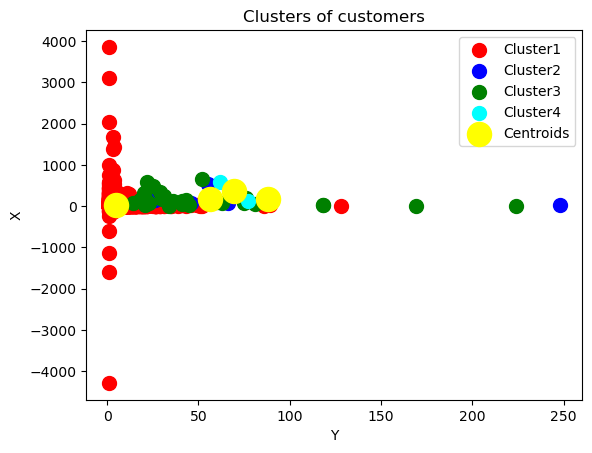

In [113]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')\

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.show()


In [121]:
X[y_kmeans == 0]

array([[2.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.00000000e+00, 2.36813187e+01, 4.31000000e+03, ...,
        2.45800000e+03, 1.35054945e+01, 3.65000000e+02],
       [4.00000000e+00, 5.79754839e+01, 1.79724000e+03, ...,
        2.34100000e+03, 7.55161290e+01, 2.82000000e+02],
       ...,
       [3.00000000e+00, 1.35846154e+01, 1.76600000e+02, ...,
        9.80000000e+01, 7.53846154e+00, 1.18000000e+02],
       [1.60000000e+01, 2.77100529e+00, 2.09488000e+03, ...,
        1.39700000e+03, 1.84788360e+00, 3.33000000e+02],
       [3.00000000e+00, 2.62468571e+01, 1.83728000e+03, ...,
        1.58600000e+03, 2.26571429e+01, 1.58000000e+02]])